<a href="https://colab.research.google.com/github/ZerihunWaje/Mnist_image_processing_using_Neural_Network/blob/main/Mnist_image_processing_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings # to ignore the warning error during
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

**import sample dataset for the test and train**

In [ ]:
batch_size=128 # the dataset is more than 1million so we fix it to 128
num_classes=10
epochs=2
#the data,split between train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#normalize to 0 to 1 range
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
#convert class vector to binary class metrics
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


**Checking the dataset if the image is correctly lable**

Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


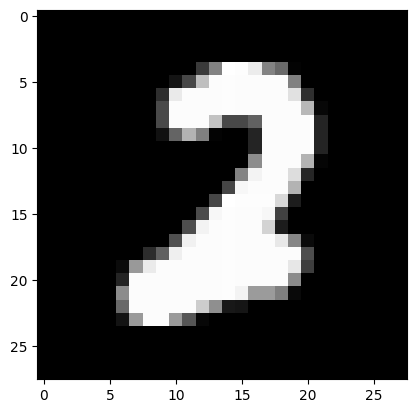

In [ ]:
print('Label:',y_test[199:200])
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

**creating the model**

In [ ]:
first_layer_size=32# input layer
model=Sequential()
model.add(Dense(first_layer_size,activation='sigmoid',input_shape=(784,))) # all the input into the hidden layer
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


to check if pattern is the same before it is trained by the model

Shape of First layer (784, 32)
Visualization of first layer


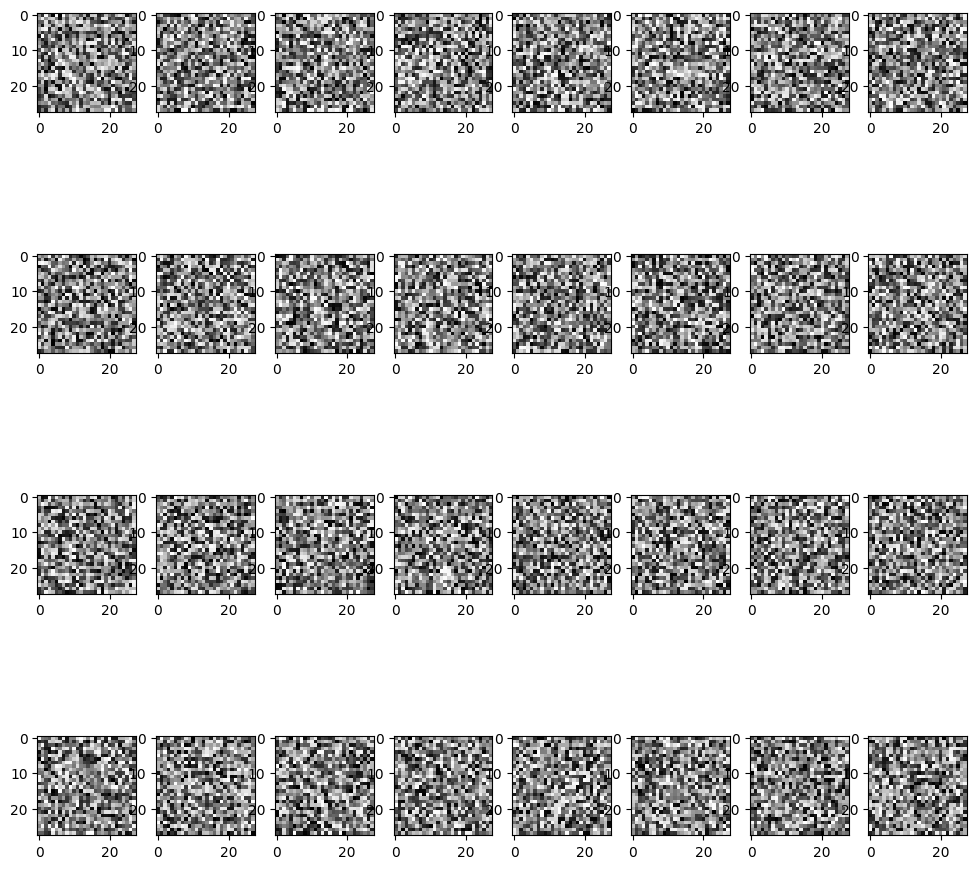

In [ ]:
w=[]
for layer in model.layers:
    weights=layer.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("Shape of First layer",layer1.shape)
print("Visualization of first layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range(1,columns*rows +1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
from keras.src.optimizers import optimizer
model.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(),
               metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/2
469/469 [==============================] - 5s 6ms/step - loss: 1.7095 - accuracy: 0.4690
Epoch 2/2
469/469 [==============================] - 3s 6ms/step - loss: 0.7341 - accuracy: 0.8163


In [ ]:
#write the testing input and output variables
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test loss:',score[1])

Test loss: 0.47293365001678467
Test loss: 0.882099986076355


Shape of First layer (784, 32)
Visualization of first layer


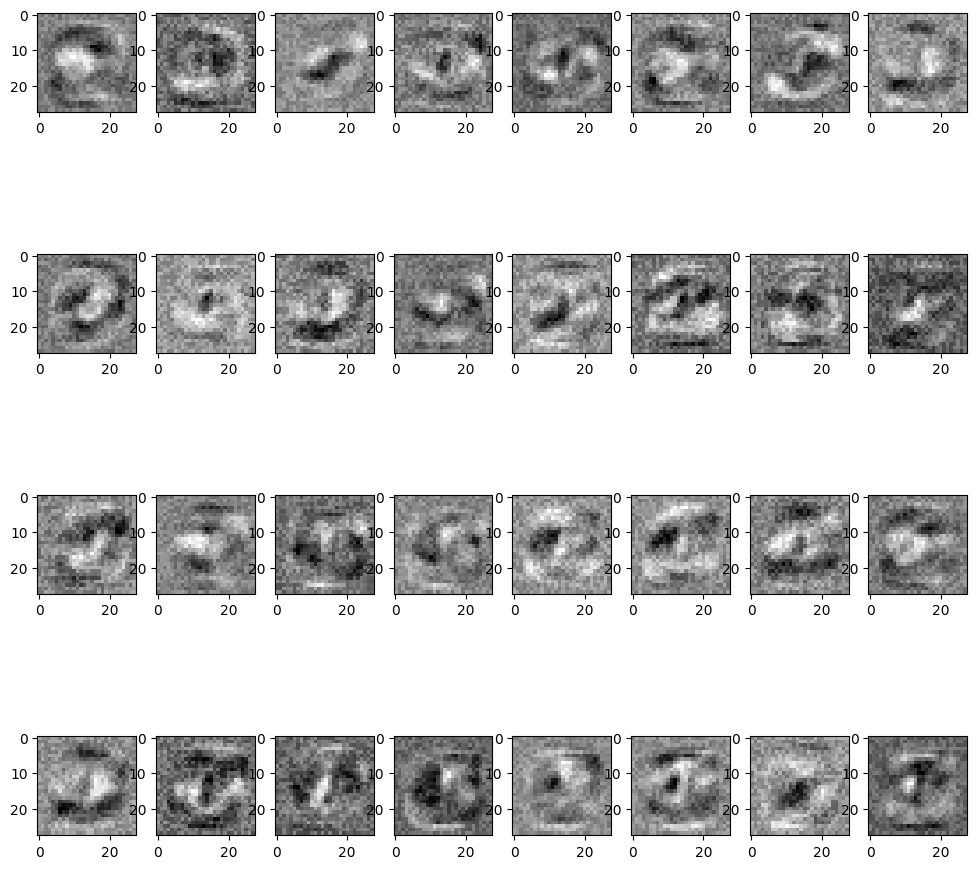

In [ ]:
w=[]
for layer in model.layers:
    weights=layer.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("Shape of First layer",layer1.shape)
print("Visualization of first layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)
for i in range(1,columns*rows +1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

**model Prediction**

In [ ]:
prediction=model.predict(x_test[23:24])
prediction=prediction[0]
print('prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 92ms/step
prediction
 [0.18794243 0.00133496 0.02436626 0.04381446 0.02007744 0.6482094
 0.02125148 0.00146666 0.04858618 0.00295069]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


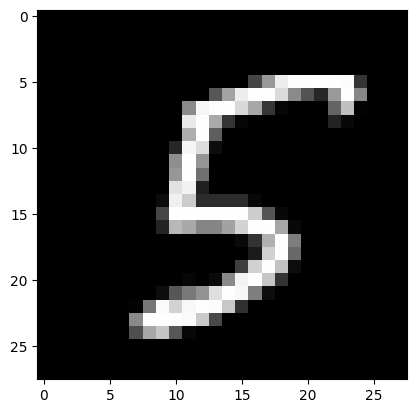

In [ ]:
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
prediction=model.predict(x_test[199:200])
prediction=prediction[0]
print('prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 30ms/step
prediction
 [0.01881257 0.00399969 0.89774305 0.01217385 0.0020455  0.00903639
 0.02923433 0.00587311 0.0180699  0.00301161]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


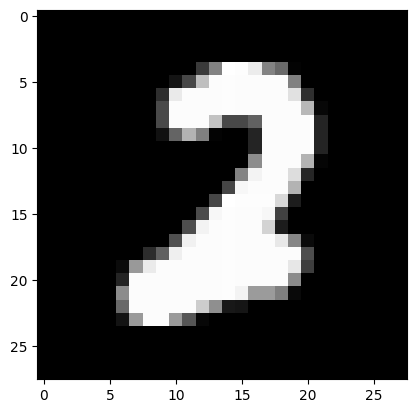

In [ ]:
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

Testing digit from the google

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving digit.jpg to digit.jpg


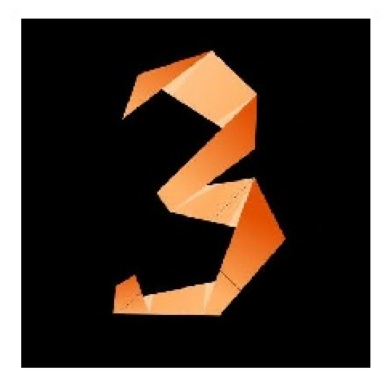

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digit.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

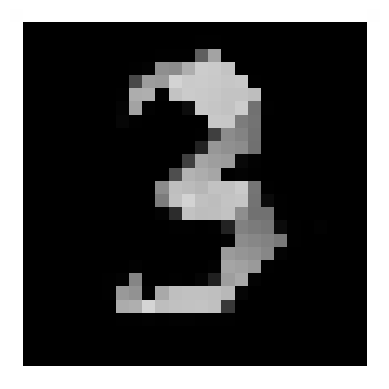

In [ ]:
image=cv2.imread('digit.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [ ]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][0])

1/1 [==============================] - 0s 78ms/step
Prediction Score:
 [7.3559623e-04 5.7970595e-02 8.1883483e-03 8.3633024e-01 1.4765322e-04
 5.9086025e-02 6.8983587e-05 1.8070458e-02 1.1601377e-02 7.8007714e-03]

Threshholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving digitfiveb.jpg to digitfiveb.jpg


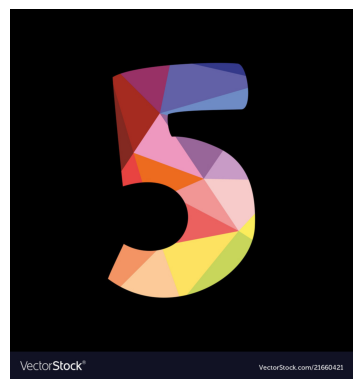

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digitfiveb.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

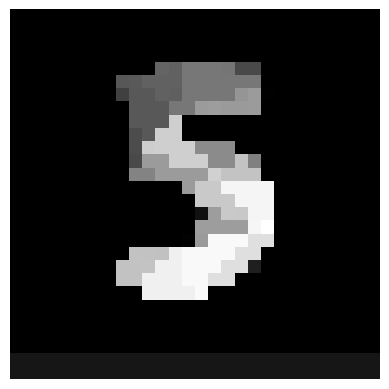

In [ ]:
image=cv2.imread('digitfiveb.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [ ]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][0])

1/1 [==============================] - 0s 21ms/step
Prediction Score:
 [0.00230969 0.02192855 0.56066597 0.00416015 0.01109694 0.00894254
 0.23727854 0.00147734 0.14272954 0.00941075]

Threshholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving digitseven.jpg to digitseven.jpg


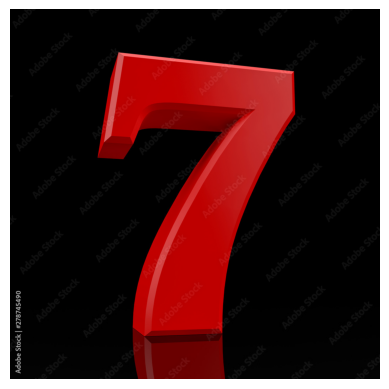

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load image in color
image_bgr=cv2.imread('digitseven.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)) # conver BgR to RgB
plt.axis ('off')# turn off tha axis labels and ticks
plt.show()

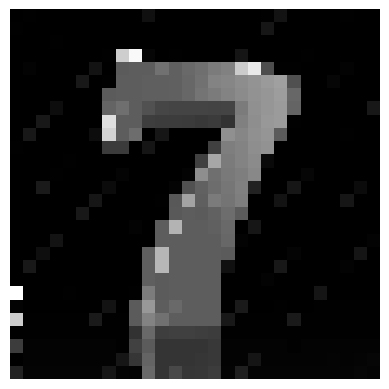

In [ ]:
image=cv2.imread('digitseven.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
#show  image
plt.imshow(image_resized,cmap='gray'),plt.axis('off')
plt.show()

In [ ]:
prediction=model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
threshholded=(prediction>0.5)*1
print('\nThreshholded Score:\n',threshholded[0])
print('\nPredicted Digit:\n',np.where(threshholded==1)[1][1])

1/1 [==============================] - 0s 198ms/step
Prediction Score:
 [0.00091733 0.4253626  0.17700909 0.21866593 0.00070269 0.03421514
 0.00236376 0.02256656 0.10300492 0.01519203]

Threshholded Score:
 [0 0 0 0 0 0 0 0 0 0]


IndexError: ignored

**Save the model in json to use later for another model**

In [ ]:
model_json=model.to_json()
#write the file name of the model
with open("model.json","w") as json_file:
  json_file.write(model_json)
#serialize weights to HDF5
#Write the file name of the weights
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


**load the model from saved model**

In [ ]:
#load json and create model
#write the file name of the model
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
#load weights into new model
#write the file name of the weights
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


**Compiling the loaded model**


In [ ]:
loaded_model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=loaded_model.fit(x_train,y_train,batch_size,epochs=epochs,verbose=1)
score=loaded_model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.3916 - accuracy: 0.8960
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.9173
Test loss: 0.2695282995700836
Test accuracy: 0.9264000058174133
